# **Fetching data from sheets**

In [ ]:
from google.colab import auth
import pandas as pd
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cce8hKR-OXET9aDwaOMrw1SvpiLtfoMk_yW4Gjsy3cU/edit#gid=0')
sheets = gsheets.worksheet('Sheet1').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])
df['id'] = df['id'].astype(int)
df['temperature'] = df['temperature'].astype(float)
df['humidity'] = df['humidity'].astype(float)
df['surface_pressure'] = df['surface_pressure'].astype(int)
df['altitude'] = df['altitude'].astype(float)
df['Solar Power (mili watts)'] = df['Solar Power (mili watts)'].astype(float)
# df['quantity'] = df['quantity'].astype(int)
# df['price'] = df['price'].astype(float)
# df['brand_recognition'] = df['brand_recognition'].astype(float)
# df['shelves'] = df['shelves'].astype(int)
# df['level'] = df['level'].astype(int)
# df['bill_id'] = df['bill_id'].astype(int)

# Convert 'time' and 'date' columns to datetime type
df['time'] = pd.to_datetime(df['time'])
df['date'] = pd.to_datetime(df['date'])

<ipython-input-1-65913e3322ca>:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-1-65913e3322ca>:30: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


# **Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
# Split the dataset into features (X) and target variable (y)
# X = data.drop(columns=['Solar Power (mili watts)'])
# X = data.drop(columns=['id'])
# X = data.drop(columns=['date'])
# y = data['Solar Power (mili watts)']



# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features using Min-Max scaling
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the input features using Min-Max scaling
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ':', coef)


Root Mean Squared Error (RMSE): 1.465488849627615
Mean Squared Error: 2.1476575683828707
R-squared Score: 0.15604969223513132
Mean Absolute Error: 1.1588425109422293
Coefficients:
temperature : 0.20044732863986825
humidity : -0.03442849531456206
surface_pressure : -0.00217666489225489
altitude : -0.023140868247960383
time : 0.6608073640528703


In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared Score (Ridge):", r2_ridge)
print("Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(feature, ':', coef)
print("Intercept:")
print(ridge_model.intercept_)


Mean Squared Error (Ridge): 2.154289630020023
R-squared Score (Ridge): 0.1534435363273231
Coefficients:
temperature : 0.20166982193992739
humidity : -0.03494968000471072
surface_pressure : -0.0021908635460777086
altitude : -0.023154358094584757
time : 0.6438950521147927
Intercept:
220.6270736084843


In [ ]:
ridge_model.predict([[26.8,41.9,98720,225.34,1]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([3.71167597])

# **Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Print feature importances (coefficients)
print("Feature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(feature, ':', importance)


Root Mean Squared Error (RMSE): 0.5708611031132004
Mean Squared Error: 0.32588239904761995
R-squared Score: 0.8719402222122021
Mean Absolute Error: 0.3681333333333357
Feature Importances:
temperature : 0.6738393903712909
humidity : 0.09193358747075306
surface_pressure : 0.18677365776169286
altitude : 0.02320499400425323
time : 0.024248370392009905


In [ ]:
ans=model.predict([[30.3, 42, 98646, 225.73, 3]])
print(ans)

[6.486]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# (With feature selection and hyperparameter tuning)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Feature selection
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)
best_rf_model = grid_search.best_estimator_

# Train the best model
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_rf = best_rf_model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) and R-squared score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared Score:", r2_rf)


Random Forest:
Mean Squared Error (MSE): 0.9466811682649743
R-squared Score: 0.6820784846210421


# **Graph for predicted vs actual outputs**

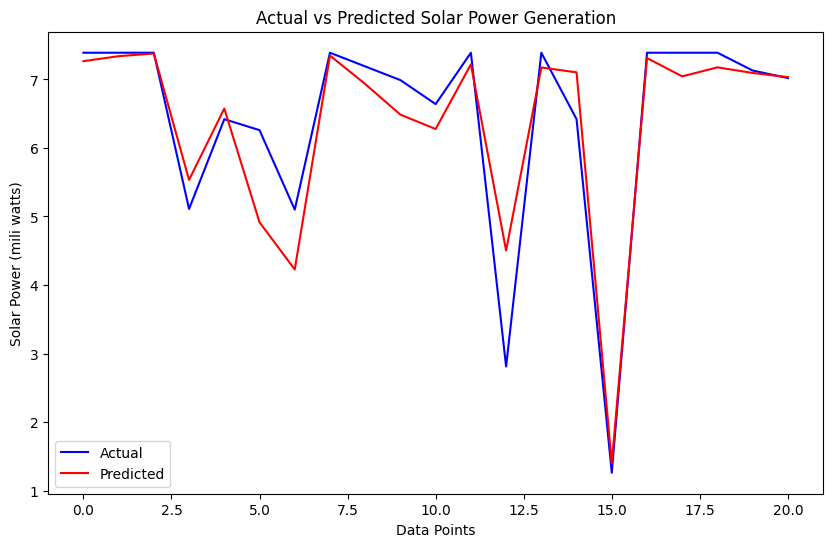

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Solar Power Generation')
plt.xlabel('Data Points')
plt.ylabel('Solar Power (mili watts)')
plt.legend()
plt.show()

# **Gradient Boosting**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(feature, ':', importance)


Root Mean Squared Error (RMSE): 0.55286984139645
Mean Squared Error: 0.3056650615257358
R-squared Score: 0.8798848910807258
Mean Absolute Error: 0.36094486251957725
Feature Importances:
temperature : 0.6517452873473565
humidity : 0.1203670461670082
surface_pressure : 0.18275481087416046
altitude : 0.021192897458643063
time : 0.02393995815283185


# **Saving Tflite model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf

# Load the dataset
# data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# Extract hour from the 'time' column
data['hour'] = data['time'].dt.hour

# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])

def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

# Convert scikit-learn model to TensorFlow model
input_shape = X_train.shape[1:]
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(1)
])
# Manually set the weights based on feature importances
weights = np.array(model.feature_importances_).reshape(-1, 1)
bias = np.zeros((1,))
model_tf.set_weights([weights, bias])

# Save TensorFlow model as a SavedModel
tf.saved_model.save(model_tf, 'tf_saved_model')

# Convert SavedModel to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_saved_model('tf_saved_model')
tflite_model = converter.convert()

# Save TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved successfully!")


Mean Squared Error (MSE): 0.3056650615257358
R-squared Score: 0.8798848910807258
TensorFlow Lite model saved successfully!


In [ ]:
print(X_train)
for i, detail in enumerate(input_details):
    print(f"Input {i} - Name: {detail['name']}, Shape: {detail['shape']}, Type: {detail['dtype']}")

     temperature  humidity  surface_pressure  altitude  time
55          28.6      41.5             98704    225.34     1
22          27.9      37.6             98783    220.45     1
76          28.9      39.2             98631    225.34     2
44          28.9      39.2             98639    225.34     2
72          27.9      35.8             98661    225.34     2
..           ...       ...               ...       ...   ...
71          27.5      41.1             98710    225.34     1
14          37.8      33.6             98672    223.43     3
92          27.1      38.9             98671    225.34     2
51          34.5      39.1             98649    225.34     1
102         27.1      41.6             98711    225.34     1

[83 rows x 5 columns]
Input 0 - Name: serving_default_input_1:0, Shape: [1 5], Type: <class 'numpy.float32'>


In [ ]:
import numpy as np
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
# Sample data for prediction (example)
sample_data = np.array([[28.6,41.5, 98704, 225.34, 1]])

# Make predictions
interpreter.set_tensor(input_details[0]['index'], sample_data.astype(np.float32))
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index'])

print("Predicted Solar Power (mili watts):", predictions)


[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([1, 5], dtype=int32), 'shape_signature': array([-1,  5], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Predicted Solar Power (mili watts): [[18067.066]]


# (With feature selection and hyperparameter tuning)

In [ ]:
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_gb.best_params_)
model_gb = grid_gb.best_estimator_
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared Score:", r2_gb)

NameError: name 'GridSearchCV' is not defined

# **Graph for predicted vs actual outputs**

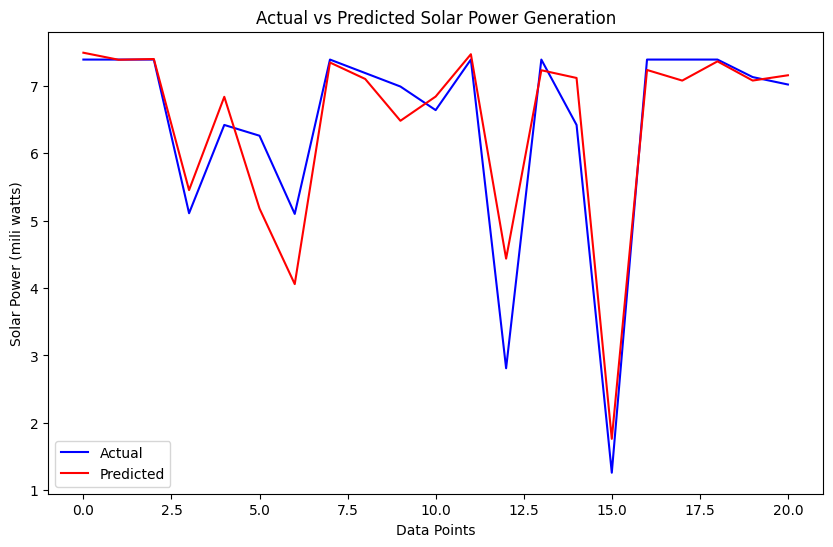

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Solar Power Generation')
plt.xlabel('Data Points')
plt.ylabel('Solar Power (mili watts)')
plt.legend()
plt.show()

# **Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) regressor
model = SVR(kernel='rbf')  # RBF kernel is commonly used for non-linear regression
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Root Mean Squared Error (RMSE): 0.8426897564665122
Mean Squared Error: 0.7101260256535897
R-squared Score: 0.7209466319374855
Mean Absolute Error: 0.5243970038452999


# (With feature selection and hyperparameter tuning)

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV

# Feature selection
selector = SelectPercentile(percentile=50)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)
best_svm_model = grid_search.best_estimator_

# Train the best model
best_svm_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_svm = best_svm_model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) and R-squared score
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM):")
print("Mean Squared Error (MSE):", mse_svm)
print("R-squared Score:", r2_svm)


Support Vector Machine (SVM):
Mean Squared Error (MSE): 1.5055253436242253
R-squared Score: 0.40838400133956454


# **KNN**

Root Mean Squared Error (RMSE): 0.9527893886098957
Mean Squared Error: 0.9078076190476188
R-squared Score: 0.6432650480386326
Mean Absolute Error: 0.5398095238095239


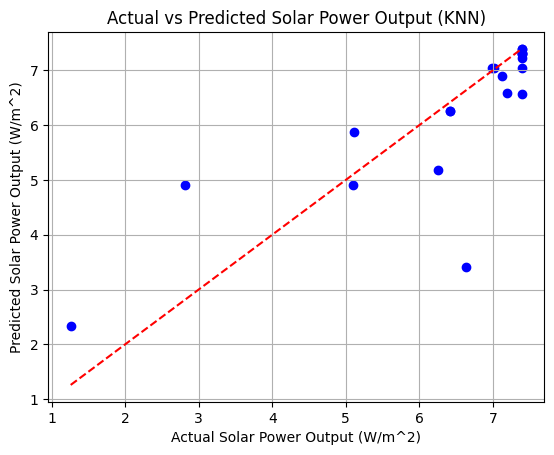

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df

data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-Nearest Neighbors (KNN) regressor
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) as needed
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Plot a graph comparing predicted outputs with actual outputs
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Solar Power Output (W/m^2)')
plt.ylabel('Predicted Solar Power Output (W/m^2)')
plt.title('Actual vs Predicted Solar Power Output (KNN)')
plt.grid(True)
plt.show()


# (With feature selection and hyperparameter tuning)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

# Feature selection
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)
best_knn_model = grid_search.best_estimator_

# Train the best model
best_knn_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_knn = best_knn_model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) and R-squared score
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN):")
print("Mean Squared Error (MSE):", mse_knn)
print("R-squared Score:", r2_knn)


K-Nearest Neighbors (KNN):
Mean Squared Error (MSE): 0.35363401072150547
R-squared Score: 0.8610348611537434


# **Graph for predicted vs actual outputs**

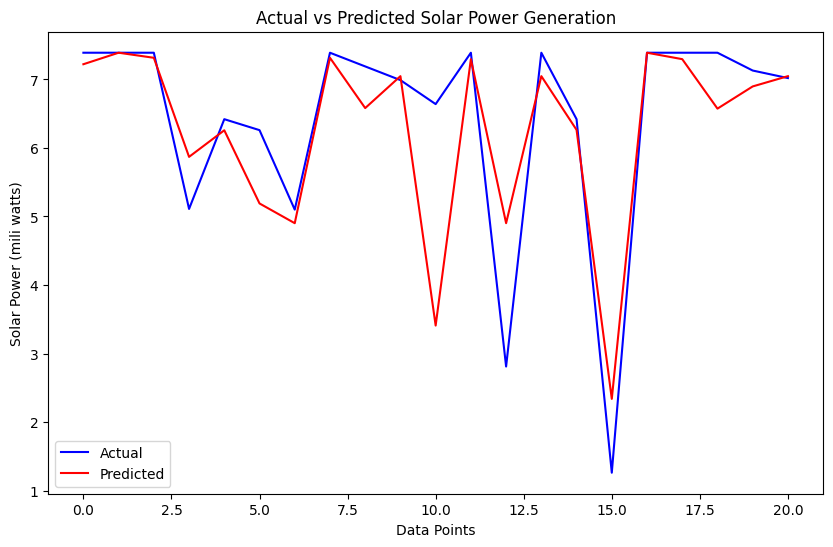

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Solar Power Generation')
plt.xlabel('Data Points')
plt.ylabel('Solar Power (mili watts)')
plt.legend()
plt.show()

# **Neural Networks**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Epoch 1/100
3/3 [==============================] - 2s 10ms/step - loss: 34.9101
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 34.2306
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 33.6070
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 33.0034
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 32.4493
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 31.8523
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 31.2123
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 30.5298
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 29.8034
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 29.0144
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 28.1630
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 27.1783
Epoch 13/100
3/3 [==============================

# **LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
#data = pd.read_csv('/content/weather data.csv')
data = df
data['time'] = pd.to_datetime(data['time'])

# # Extract hour, minute, and second from the 'time' column
data['hour'] = data['time'].dt.hour
# data['minute'] = data['time'].dt.minute
# data['second'] = data['time'].dt.second
# Drop unnecessary columns including 'id', 'date', and the original 'time' column
data = data.drop(columns=['id', 'date', 'time'])
def assign_time_of_day(hour):
    if hour < 12:
        return 2
    elif hour < 16:
        return 3
    else:
        return 1

# Apply the function to create a new 'time' column indicating time of day
data['time'] = data['hour'].apply(assign_time_of_day)

data = data.drop(columns=['hour'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Solar Power (mili watts)'])
y = data['Solar Power (mili watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input features for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the testing set
y_pred = model.predict(X_test_reshaped)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Epoch 1/50
3/3 [==============================] - 2s 6ms/step - loss: 34.3111
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 34.1276
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 33.9572
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 33.7798
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 33.6156
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 33.4372
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 33.2442
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 33.0449
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 32.8222
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 32.5773
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 32.3062
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 32.0083
Epoch 13/50
3/3 [==============================] - 0s 6ms/st

# **Graph for predicted vs actual outputs**

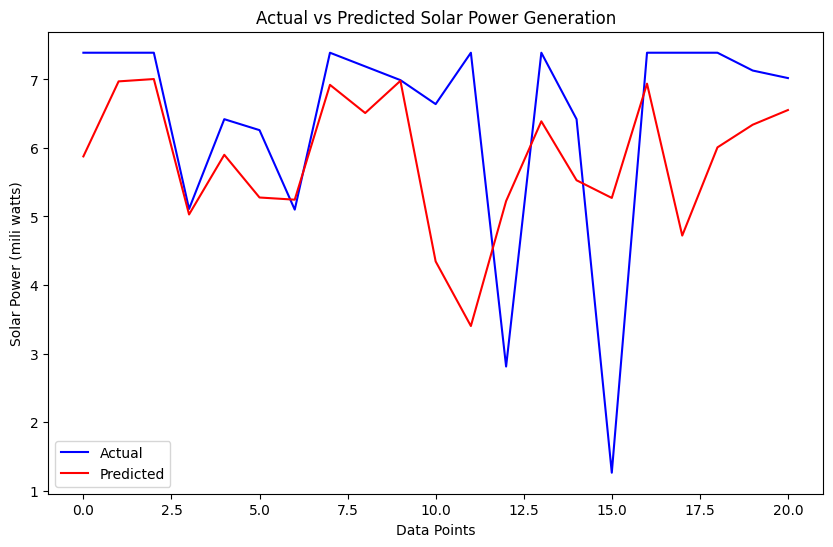

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Solar Power Generation')
plt.xlabel('Data Points')
plt.ylabel('Solar Power (mili watts)')
plt.legend()
plt.show()

# *`Prediction for new data points `*

In [ ]:
# Example of new data points (replace with your actual data)
new_data = pd.DataFrame({
    'temperature': [28.5, 29.0, 40.1],
    'humidity': [45.2, 42.8, 41.5],
    'surface_pressure': [98500, 98600, 98700],
    'altitude': [230.5, 231.0, 229.8],
    'time': [2, 1, 3]
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions for the new data points
predicted_outputs = model.predict(new_data_scaled)

# Print the predicted outputs
print("Predicted Solar Power Generation:")
for prediction in predicted_outputs:
    print(prediction)

Predicted Solar Power Generation:
4.1415
4.1415
4.1415


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Anomly detection**

Anomalous data points: [50]


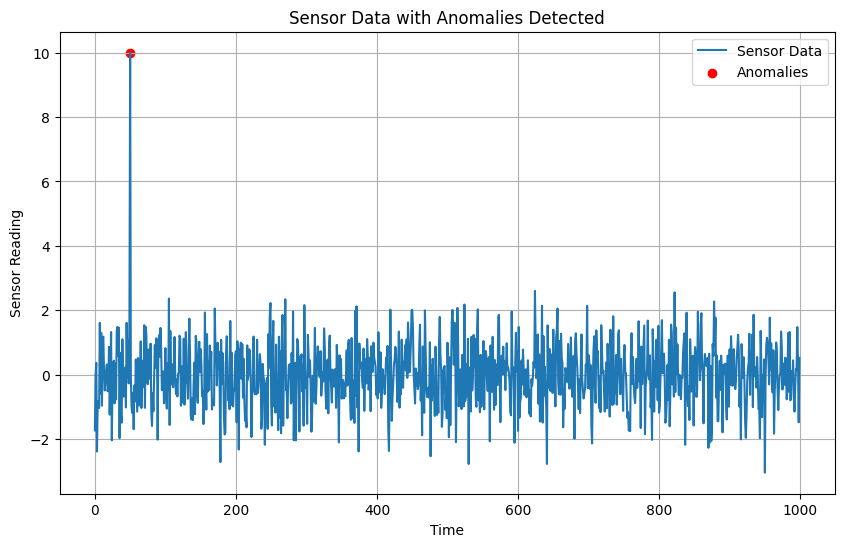

In [ ]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

def detect_anomalies(sensor_data, threshold=3):
    z_scores = np.abs(zscore(sensor_data))
    anomalies = np.where(z_scores > threshold)[0]
    return anomalies

# Generate sample sensor data (replace with actual data)
sensor_data = np.random.normal(loc=0, scale=1, size=1000)
sensor_data[50] = 10  # Introduce an anomaly

# Detect anomalies
anomalies = detect_anomalies(sensor_data, threshold=3)
print("Anomalous data points:", anomalies)

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(sensor_data, label='Sensor Data')
plt.scatter(anomalies, sensor_data[anomalies], color='red', label='Anomalies')
plt.title('Sensor Data with Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load your CSV data into a DataFrame
df = pd.read_csv('/content/weather data.csv')

# Extract columns for temperature, humidity, surface_pressure, altitude, and solar_power
temperature_data = df['temperature']
humidity_data = df['humidity']
surface_pressure_data = df['surface_pressure']
altitude_data = df['altitude']
solar_power_data = df['Solar Power (mili watts)']

# Define percentiles for anomaly detection
percentiles = [1, 5, 95, 99]

# Calculate percentiles for each parameter
temperature_thresholds = np.percentile(temperature_data, percentiles)
humidity_thresholds = np.percentile(humidity_data, percentiles)
surface_pressure_thresholds = np.percentile(surface_pressure_data, percentiles)
altitude_thresholds = np.percentile(altitude_data, percentiles)
solar_power_thresholds = np.percentile(solar_power_data, percentiles)

print("Thresholds for temperature:", temperature_thresholds)
print("Thresholds for humidity:", humidity_thresholds)
print("Thresholds for surface pressure:", surface_pressure_thresholds)
print("Thresholds for altitude:", altitude_thresholds)
print("Thresholds for solar power:", solar_power_thresholds)


Thresholds for temperature: [26.109 26.8   38.4   44.125]
Thresholds for humidity: [33.403 35.03  45.535 47.988]
Thresholds for surface pressure: [98002.29 98449.15 99143.55 99220.73]
Thresholds for altitude: [176.32   176.592  226.729  249.2765]
Thresholds for solar power: [0.7062 1.9845 7.39   7.39  ]


# **Rainfall Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the provided CSV file
data = pd.read_csv("data.csv")

# Prepare the feature matrix (X) and target variable (y)
X = data[['temperature_2m (°C)', 'relative_humidity_2m (%)']]
y = data['rain (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Test the model with custom inputs
custom_temperature = 15.0  # Replace with your custom temperature value
custom_humidity = 80.0  # Replace with your custom humidity value
custom_data = [[custom_temperature, custom_humidity]]
predicted_rainfall = model.predict(custom_data)
print("Predicted Rainfall:", predicted_rainfall[0])
